In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import createSymmetry, createAsymmetry
import pandas as pd
import rpack
import random
import cv2

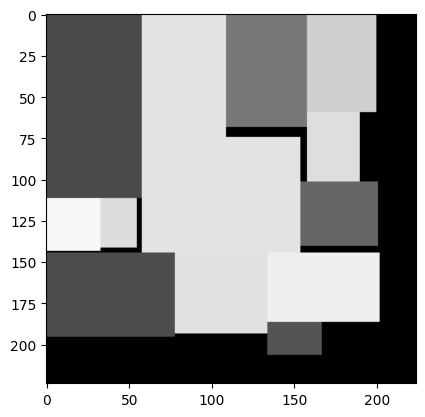

In [2]:
# Inserts into image by replacing the pixels with the desiredposition
def insert(insert, img, position):
    img[position[0]:position[0]+insert.shape[0], position[1]:position[1]+insert.shape[1]] = insert

mnist = pd.read_csv('MNIST/mnist_test.csv')

possible = True
squareSizes = []

while possible:
    square = createAsymmetry(mnist)
    try: 
        p = rpack.pack(squareSizes+[square.shape[:2]],max_width=224,max_height=224)
        squareSizes.append(square.shape[:2])
    except rpack.PackingImpossibleError:
        possible = False

background = np.zeros((224,224,3)).astype(np.uint8)

for idx,square in enumerate(squareSizes):
    rect1 = np.full((square[0], square[1],3),random.randrange(50,255))
    insert(rect1,background,p[idx])

plt.imshow(background)


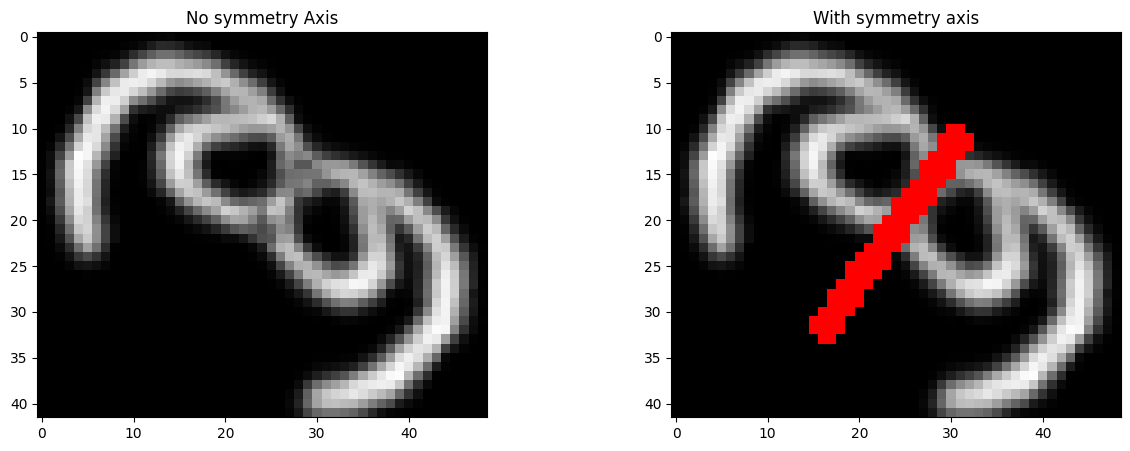

In [3]:
img,axisStart,axisEnd,symDictionary = createSymmetry(54,mnist)
display = img.copy()
cv2.line(display, (int(axisStart[0]), int(axisStart[1])), (int(axisEnd[0]), int(axisEnd[1])), [255,0,0], 2) 

# Display
_, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'No symmetry Axis')
ax[1].imshow(display), ax[1].set_title(f'With symmetry axis')
plt.show()

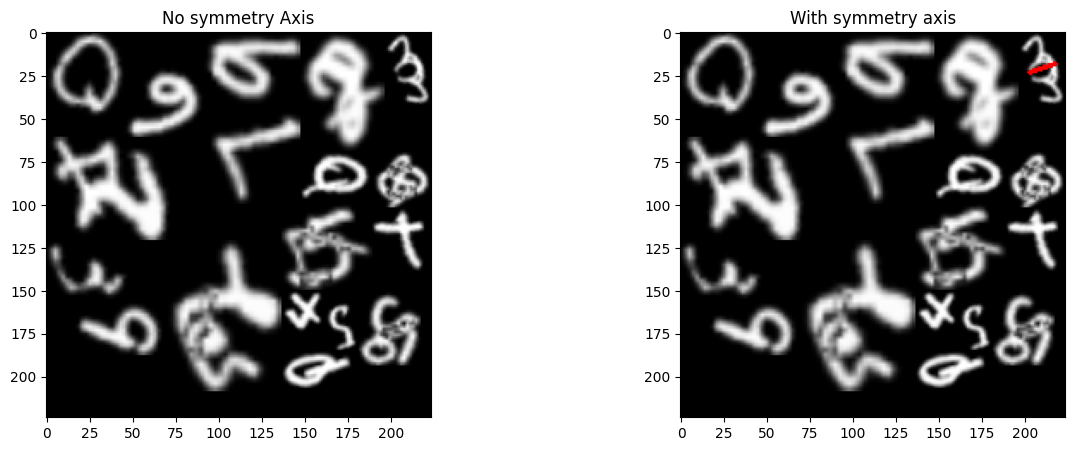

In [43]:
# Returns image of selected size with randomly placed digits and a symmetry as well as the data for the symmetry
def getRandomDigitsWithSymmetry(id, mnist, size):
    # Elements for while loop
    possible = True
    squareSizes = []
    elements = []

    # Adding symmetry and placing it in the first place of the list
    symmetry,sa,ea,symDictionary = createSymmetry(id,mnist)
    squareSizes.append(symmetry.shape[:2])
    elements.append(symmetry)
    positions = []

    # Attemting to add elements until impossible
    while possible:
        square = createAsymmetry(mnist)
        try: 
            positions = rpack.pack(squareSizes+[square.shape[:2]],max_width=size[1],max_height=size[0])
            squareSizes.append(square.shape[:2])
            elements.append(square)
        except rpack.PackingImpossibleError:
            possible = False

    # Final result
    background = np.zeros((size[1],size[0],3)).astype(np.uint8)

    # Inserting the digits on their specific position
    for idx,digit in enumerate(elements):
        insert(digit,background,positions[idx])
    
    return background, ( sa[0]+positions[0][1],sa[1]+positions[0][0],), (ea[0]+positions[0][1],ea[1]+positions[0][0]), symDictionary

img, axisStart, axisEnd, dic = getRandomDigitsWithSymmetry(random.randint(0,10000), mnist, (224,224))

display = img.copy()

cv2.line(display, (int(axisStart[0]), int(axisStart[1])), (int(axisEnd[0]), int(axisEnd[1])), [255,0,0], 2) 

# Display
_, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'No symmetry Axis')
ax[1].imshow(display), ax[1].set_title(f'With symmetry axis')
plt.show()

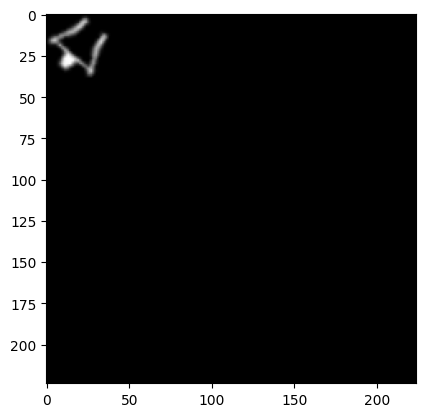

In [10]:
finalIimage = np.zeros((224,224,3)).astype(np.uint8)
mnist = pd.read_csv('MNIST/mnist_test.csv')

symm,_,_,_ = createSymmetry(2523,mnist)

padX = 0
padY = 0

finalIimage[padX:padX+symm.shape[0], padY:padY+symm.shape[1]] = symm

plt.imshow(finalIimage)